# Understanding Overfitting Model
1. Under fit
2. Good fit
3. Over fit

In [79]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [80]:
# sample dataset
X = np.arange(1, 6)
Y = np.arange(2, 11, 2)
print(X, Y)
df = pd.DataFrame(X, columns=['X'])
df['Y'] = Y
df

[1 2 3 4 5] [ 2  4  6  8 10]


,X,Y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


### NOTE for above: 
Fits the perfect straight line: Y = 2X

---

In [81]:
# Adding noise
Y = np.arange(2, 11, 2)
Y = [round(i + rd.random(), 2) for i in Y]
df['Y'] = Y
df

,X,Y
0,1,2.03
1,2,4.19
2,3,6.76
3,4,8.45
4,5,10.72


### NOTE for above:
A good model will draw a smooth line through the trend.
An overfitting model will draw a cruvy line passing through every data point, learns noise. 

---

## Experimenting

In [82]:
# Generate data
np.random.seed(0)
X = np.linspace(0, 5, 30)
y = 2 * X + 1 + np.random.randn(30)  # linear relation + noise
X, y

(array([0.        , 0.17241379, 0.34482759, 0.51724138, 0.68965517,
        0.86206897, 1.03448276, 1.20689655, 1.37931034, 1.55172414,
        1.72413793, 1.89655172, 2.06896552, 2.24137931, 2.4137931 ,
        2.5862069 , 2.75862069, 2.93103448, 3.10344828, 3.27586207,
        3.44827586, 3.62068966, 3.79310345, 3.96551724, 4.13793103,
        4.31034483, 4.48275862, 4.65517241, 4.82758621, 5.        ]),
 array([ 2.76405235,  1.74498479,  2.66839316,  4.27537596,  4.24686833,
         1.74686005,  4.01905393,  3.2624359 ,  3.65540184,  4.51404678,
         4.59231943,  6.24737696,  5.89896876,  5.60443364,  6.27144944,
         6.50608812,  8.01132045,  6.6569107 ,  7.51996425,  6.6976284 ,
         5.34356191,  8.89499791,  9.4506431 ,  8.18886946, 11.54561669,
         8.16632398, 10.01127576, 10.12316098, 12.18795163, 12.46935877]))

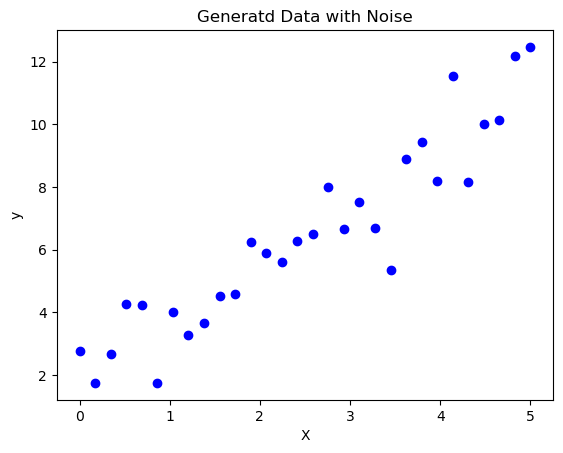

In [83]:
plt.scatter(X, y, color='blue')
plt.title('Generatd Data with Noise')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Fit different models

In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [85]:
def plot_poly_fit(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(X_poly, y)
    X_fit = np.linspace(0, 5, 100)
    y_fit = model.predict(poly.transform(X_fit.reshape(-1, 1)))
    plt.scatter(X, y, color='blue')
    plt.plot(X_fit, y_fit, color='red')
    plt.title(f'Polynomial Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

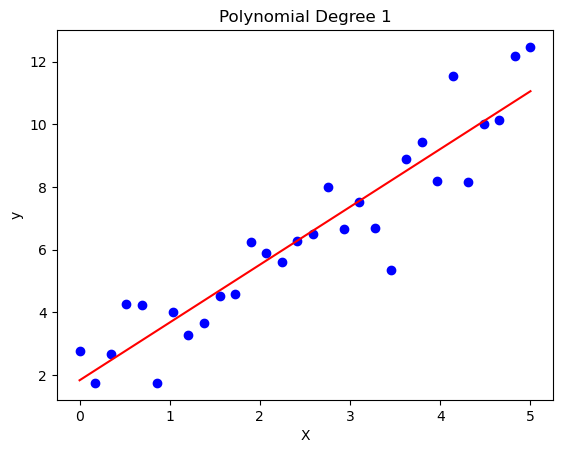

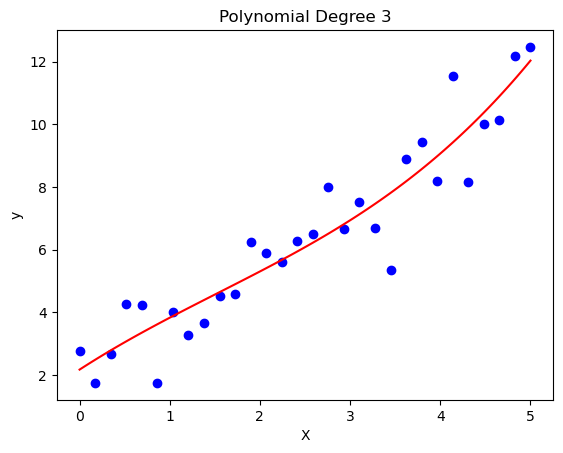

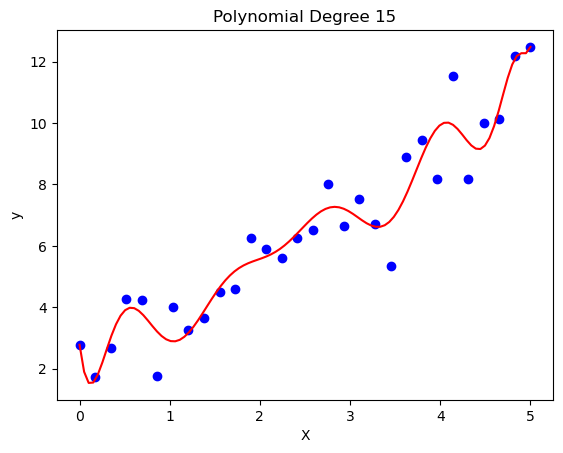

In [86]:
plot_poly_fit(1) # underfitting
plot_poly_fit(3) # good fit
plot_poly_fit(15) # overfitting

### NOTE for above:
**Why Overfitting Happens?**
- When _**model complexity (degree, parameters) >> data size**_, model tries to fit noise rather than trend.

---

# Understanding Polynomial Features
- Input Feature
    X = [x1]
- Output Feature (degree = 2)
  x1 = [1, x1, x1^2]

In [87]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures

In [88]:
X = np.array([[2], [3], [4]])
X

array([[2],
       [3],
       [4]])

In [89]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly # [bias, x, x^2, x^3]

array([[ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

### NOTE for above
Higher the degree, the more flexibility the model gains

---

## Example

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [91]:
X = np.linspace(0, 5, 30).reshape(-1, 1)
y = 2 * X.flatten() + 1 + np.random.randn(30)

In [92]:
df = pd.DataFrame(X, columns=['X'])
df['y'] = y
df

,X,y
0,0.000000,1.154947
1,0.172414,1.722990
2,0.344828,0.801869
3,0.517241,0.053686
4,0.689655,2.031398
5,0.862069,2.880487
6,1.034483,4.299256
7,1.206897,4.616173
8,1.379310,3.371294
9,1.551724,3.801146


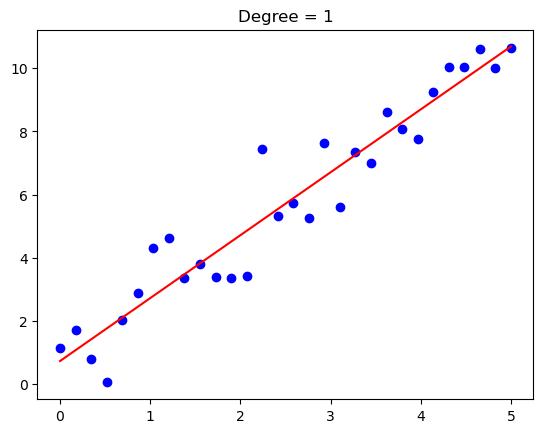

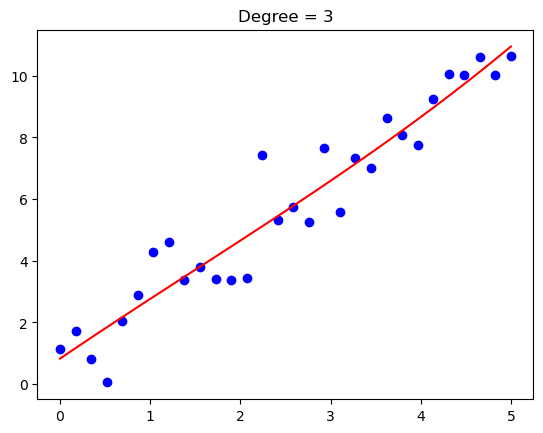

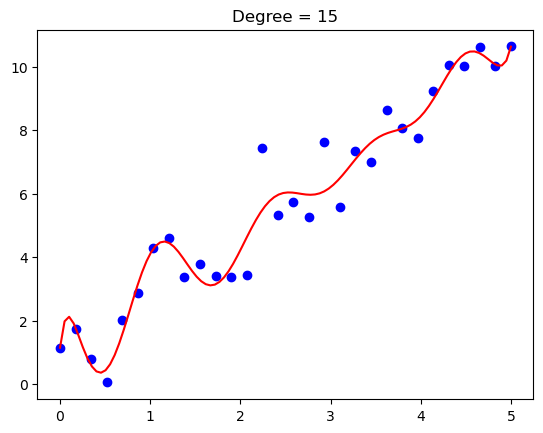

In [93]:
for degree in [1, 3, 15]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    X_fit = np.linspace(0, 5, 100).reshape(-1, 1)
    y_fit = model.predict(poly.fit_transform(X_fit))

    plt.scatter(X, y, color='blue')
    plt.plot(X_fit, y_fit, color='red')
    plt.title(f'Degree = {degree}')
    plt.show()